# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [175]:
# Libraries
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
import math


# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

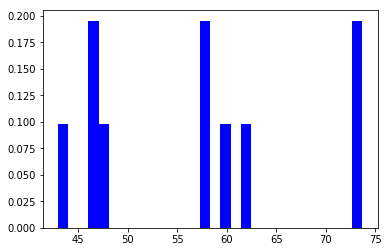

In [26]:
size10= norm.rvs(loc=50, scale=15, size=10, random_state=42)

plt.hist(x=size10, bins=30, color='b',normed = 1)
plt.show()

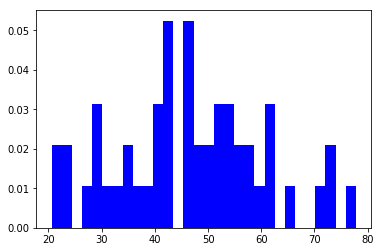

In [21]:
size50= norm.rvs(loc=50, scale=15, size=50, random_state=42)

plt.hist(x=size50, bins=30, color='b',normed = 1)
plt.show()

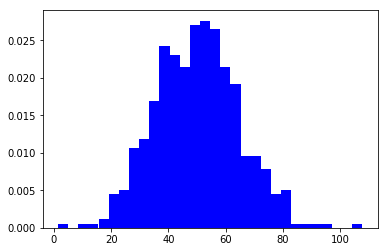

In [19]:
size500= norm.rvs(loc=50, scale=15, size=500, random_state=42)

plt.hist(x=size500, bins=30, color='b',normed = 1)
plt.show()

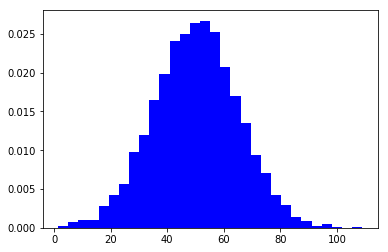

In [18]:
size5000= norm.rvs(loc=50, scale=15, size=5000, random_state=42)

plt.hist(x=size5000, bins=30, color='b',normed = 1)
plt.show()

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](../images/ch-1.png)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

 Defining what is the mean (loc) and the standard deviation (scale), as we increase the number of sample, more precise is the distribution

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

see above :)

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [217]:
n = 5
dist= binom(n=5, p=0.15)


#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](../images/ch-2.png)

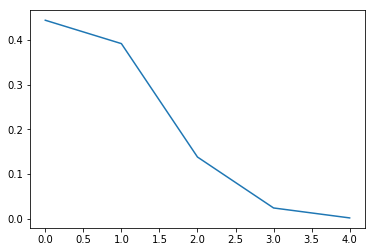

In [148]:
# run this code
n= 5

x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Step 3: Explain what you observe from the plot above.

The probability of a video watcher click in the advertisement is higher with a non-zero youtube watcher.

No one wants to click in the advertisement.

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

### n = 50

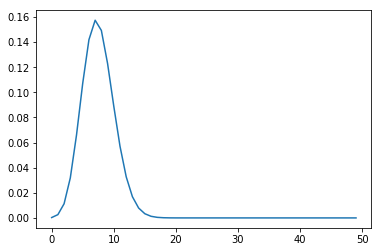

In [114]:
n= 50
p = 0.15
dist_50= binom(n, p)
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist_50.pmf(x))

plt.show()

### n = 500

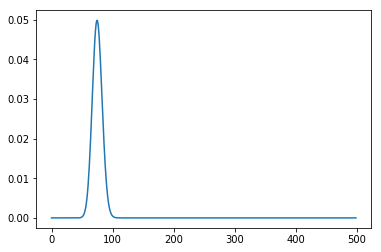

In [83]:
n= 500
p = 0.15
dist_500= binom(n, p)
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist_500.pmf(x))

plt.show()

### n = 5000

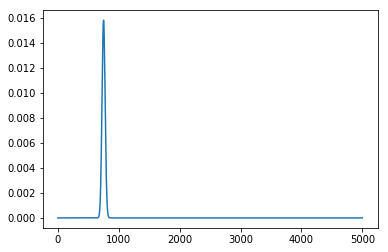

In [84]:
n= 5000
p = 0.15
dist_5000= binom(n, p)
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist_5000.pmf(x))

plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

In a Poisson distribution, when you increase the average/rate parameter (lambda), the looking for probability decrase exponentially. 

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.


poisson.pmf(visits, mu)

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [189]:
poisson.pmf(320,300)

0.011612348610402475

#### Step 3: What is the probability of getting 60 visits?

In [142]:
poisson.pmf(60,300)

2.622743762294515e-64

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [209]:
arr = poisson.pmf(range(0, 1001),300)

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](../images/ch-3.png)

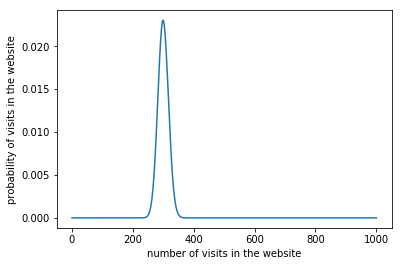

In [143]:
# run this code
plt.plot(arr)
plt.xlabel('number of visits in the website')
plt.ylabel('probability of visits in the website')
plt.show()


# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [196]:
mu = 35
std = 8
sample = 200
sigma = std/math.sqrt(sample)
#probability accumulative between 0 min and 30 min.
probability_0to30 =  norm.cdf(30, mu, sigma)

#probability accumulative between 0 min and 35 min.
probability_0to35 = norm.cdf(35, mu, sigma)

#probability in the range of 30 and 35 min
probability = probability_0to35 -probability_0to30
probability


0.5

#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [195]:
mu = 35 #min
std = 8
sample = 200
sigma = std/math.sqrt(sample)
time = 115*60/200  #time to deliver a package 115 hours/200 packages

#probability from zero min to 115 hours
probability_0to115 = norm.cdf(time, mu, sigma)
probabilitymore115 = 1 - probability_115

probabilitymore115

0.8116204410942089

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [200]:
mu = 200

sigma = 40 #(std/sqrt(samples))

#probability from zero to 300

probability_0to300 = norm.cdf(300, mu, sigma)

#probability more of 300

probability_moreof300 = 1 - probability_0to300

probability_moreof300

0.006209665325776159

#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [202]:
#probability from zero to 160

probability_0to160 = norm.cdf(160, mu, sigma)

#probability zero to 240

probability_0to240 = norm.cdf(240, mu, sigma)

#probability 160 to 240

probability_160to240 = probability_0to240 - probability_0to160

probability_160to240

0.6826894921370859

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [204]:
#probability from zero to 150

probability_0to150 = norm.cdf(150, mu, sigma)

probability_0to150

0.10564977366685535

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [205]:
#probability from zero to 3000

probability_0to3000 = norm.cdf(3000, mu, sigma)

probability_moreof3000 = 1- probability_0to3000

probability_moreof3000

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [206]:
mu = 4

prob_norobbery = poisson.cdf(0,mu)
prob_norobbery

0.018315638888734182

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [207]:
prob_1robbery = poisson.cdf(1,mu)
prob_1robbery

0.0915781944436709

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [213]:
prob_2robbery = poisson.cdf(2,mu)
prob_6robbery = poisson.cdf(6,mu)

prob_2to6robbery =  prob_6robbery - prob_2robbery

prob_2to6robbery

0.6512227160438819

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

### We assumpt that in 15 days, there are the middle of robberies than in one months. 

In [215]:
prob_0to2_robberies =  poisson.cdf(2,mu/2)
prob_moreof2_robberies = 1 - prob_0to2_robberies

prob_moreof2_robberies

0.3233235838169366